In [39]:
import sqlite3             # SQL Lite 접속
import pandas as pd        
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 설정
%matplotlib inline 

import seaborn as sns
#sns.set(style="ticks", color_codes=True)
sns.set(style="whitegrid")

import squarify 

start = '2019-04-01'
end = '2019-04-07'
next_start = '2019-04-08'
next_end = '2019-04-14'

conn = sqlite3.connect('db.sqlite3')

c = conn.cursor()
c.execute("SELECT SUM(cnt) as CNT , SUM(sum_hour) as SUM_HOUR , SUM(sum_over_hour) as SUM_OVER  \
           FROM (   \
                  SELECT company_name_id , service_date , service_type , CASE WHEN count(*) > 1 THEN 1 ELSE count(*) END  as cnt , sum(hour) as sum_hour , sum(over_hour) as sum_over_hour  \
                  FROM   usone_services \
                  WHERE  dept_name = 'DB' \
                  AND    service_date >= '{start}' \
                  AND    service_date <= '{end}' \
                  AND    service_type NOT IN ('상주','교육','휴가') \
                  GROUP BY company_name_id , service_date , service_type )"  .format(start=start , end=end))

table_rows = c.fetchall()

df_sum = pd.DataFrame(table_rows , columns=['CNT','SUM_HOUR','SUM_OVER'])


print('---------------------------------------')
print('Summary  ' , start , ' ~ ' ,end)
print('---------------------------------------')

print(df_sum)
print('---------------------------------------')
print('')

# Display Report data
c = conn.cursor()
before_com = ""
before_type = ""
before_date = ""
loop = 0

'''
for rows in c.execute("SELECT /* ALL BASED DATA */ company_name_id , service_date , service_type , emp_name , hour , over_hour , details \
                       FROM   usone_services \
                       WHERE  dept_name = 'DB' \
                       AND    service_date >= '{start}' \
                       AND    service_date <= '{end}' \
                       AND    service_type NOT IN ('상주','교육','휴가','정기점검') \
                       ORDER BY company_name_id , service_date " .format(start=start , end=end)) :
    
    str_date = rows[1].replace("-","/")
    if loop == 0 :
        before_com = rows[0]
        before_date = rows[1]
        before_type = rows[2]
        print ("[" + rows[0] + "]" )
        print ("   " + rows[6].replace("\r\n","\n\r   ") + " (" + str_date[5:] + ")" )
    else :
        if before_com == rows[0] and before_date == rows[1] and before_type == rows[2] :
            continue
        else:
            before_com = rows[0]
            before_date = rows[1]
            before_type = rows[2]
            print(" ")
            print ("[" + rows[0] + "]" )
            print ("   " + rows[6].replace("\r\n","\n\r   ") + " (" + str_date[5:] + ")" )
    loop += 1

'''    


for rows in c.execute("SELECT /* ALL BASED DATA */ company_name_id , service_date , service_type , GROUP_CONCAT(emp_name,', ') as emp_name , sum(hour)/count(*) as hour , sum(over_hour) , details  \
                       FROM   usone_services  \
                       WHERE  dept_name = 'DB' \
                       AND    service_date >= '{start}' \
                       AND    service_date <= '{end}' \
                       AND    service_type NOT IN ('상주','교육','휴가','정기점검') \
                       GROUP BY company_name_id , service_date , service_type	 " .format(start=start , end=end)) :
    
    str_date = rows[1].replace("-","/")
    
    if loop == 0 :
        before_com = rows[0]
        print ("[" + rows[0] + "] - (" + rows[3] + ")" )
        print ("    " + rows[6].replace("\r\n","\n\r    ") + " (" + str_date[5:] + ")" )
    else :
        if before_com == rows[0] :
            print ("    " + rows[6].replace("\r\n","\n\r    ") + " (" + str_date[5:] + ")" )
        else:
            before_com = rows[0]
            before_date = rows[1]
            before_type = rows[2]
            print(" ")
            print ("[" + rows[0] + "] - (" + rows[3] + ")" )
            print ("    " + rows[6].replace("\r\n","\n\r    ") + " (" + str_date[5:] + ")" )
    loop += 1
                        
                        
    
print(" ")
print('--------------정기점검-----------')   
print(" ")
for rows in c.execute(" SELECT distinct company_name_id , service_date   \
                        FROM   usone_services  \
                        WHERE  dept_name = 'DB'  \
                        AND    service_date >= '{start}'  \
                        AND    service_date <= '{end}' \
                        AND    service_type = '정기점검'   \
                        ORDER BY service_date " .format(start=start , end=end)):
    str_date = rows[1].replace("-","/")
    print(" - " + rows[0] + " (" + str_date[5:] + ")" )
    
    
    
# Display Next Week Report data
print('')
print('-----------------------------------------')
print('Next Weeks   ' , next_start , ' ~ ' ,next_end)
print('-----------------------------------------')
print('')
c = conn.cursor()
before_com = ""
before_type = ""
before_date = ""
loop = 0

for rows in c.execute("SELECT /* ALL BASED DATA */ company_name_id , service_date , service_type , emp_name , hour , over_hour , details \
                       FROM   usone_services \
                       WHERE  dept_name = 'DB' \
                       AND    service_date >= '{start}' \
                       AND    service_date <= '{end}' \
                       AND    service_type NOT IN ('상주','휴가','정기점검') \
                       ORDER BY company_name_id , service_date " .format(start=next_start , end=next_end)) :
    str_date = rows[1].replace("-","/")
    if loop == 0 :
        before_com = rows[0]
        before_date = rows[1]
        before_type = rows[2]
        print ("[" + rows[0] + "]" )
        print ("    " + rows[6].replace("\r\n","\n\r    ") + " (" + str_date[5:] + ")" )
    else :
        if before_com == rows[0] and before_date == rows[1] and before_type == rows[2] :
            continue
        else:
            before_com = rows[0]
            before_date = rows[1]
            before_type = rows[2]
            print(" ")
            print ("[" + rows[0] + "]" )
            print ("    " + rows[6].replace("\r\n","\n\r    ") + " (" + str_date[5:] + ")" )
    loop += 1
    
print(" ")
print('--------------정기점검-----------')   
print(" ")
for rows in c.execute(" SELECT distinct company_name_id , service_date   \
                        FROM   usone_services  \
                        WHERE  dept_name = 'DB'  \
                        AND    service_date >= '{start}'  \
                        AND    service_date <= '{end}' \
                        AND    service_type = '정기점검'   \
                        ORDER BY service_date " .format(start=next_start , end=next_end)):
    str_date = rows[1].replace("-","/")
    print(" - " + rows[0] + " (" + str_date[5:] + ")" )

---------------------------------------
Summary   2019-04-01  ~  2019-04-07
---------------------------------------
   CNT  SUM_HOUR  SUM_OVER
0   10      90.0      27.0
---------------------------------------

[AXA손해보험] - (유명수, 권성진)
    3/29 REALYZE DB 장애 원인분석 지원 (04/02)
    4/12 작업 대비 Exadata OS/DB 백업 지원(fix) (04/03)
    유지보수 상주지원 (04/05)
 
[DMD] - (최영준, 김동혁)
    #DMD 데이터 베이스 복구
    
    기존 복구 되지 않은 테이블 스페이스 복구 작업 진행 (DB2 구성)
    
    작업 내용
    
    1. 백업본을 이용한 DMDASP DB Recovery
         불 필요한 테이블 스페이스 삭제 작업
         아카이브를 이용한 복구 작업 진행
         RESET LOGS를 이용한 불완전 복구로 Open
         UNDOTBS / TEMP / USERS 교체 작업 진행
    2. DMSASP를 ORATEST로 변경 작업 진행
        컨트롤 파일 재 생성 작업 진행
    
    with 김동혁 사원 (04/01)
 
[NH투자증권] - (박경진)
    * 정기 PM 작업
    - 각 업무 서비스 페일오버 테스트
    - DBMS 중지 및 서비스 중지
    - DBMS 기동 및 서비스 재개
    - 장애 대응 모니터링 (04/06)
 
[금융결제원] - (최순석)
    #e사업운영팀 - 진행하던 데이터이관작업 완료하였으나  3월 파티션테이블 재작업 지시,  기존파티션 truncate 후  expdp-impdp 재수행 (04/03)
 
[기타] - (박준형)
    안랩 운영DB 스토리지 복제후 개발DB에서 
 

<Figure size 432x288 with 0 Axes>

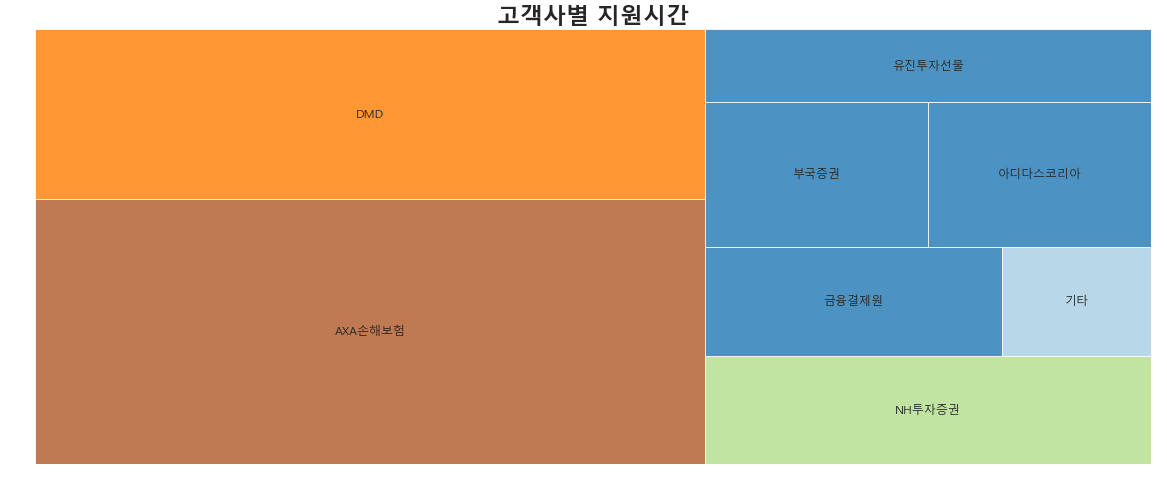

In [40]:
# 고객사별 지원 시간 Treemap

import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

c = conn.cursor()
c.execute("SELECT company_name_id , SUM(cnt) as CNT , SUM(sum_hour) as SUM_HOUR   \
           FROM (   \
                  SELECT company_name_id , service_date , service_type , CASE WHEN count(*) > 1 THEN 1 ELSE count(*) END  as cnt , sum(hour) as sum_hour , sum(over_hour) as sum_over_hour  \
                  FROM   usone_services \
                  WHERE  dept_name = 'DB' \
                  AND    service_date >= '{start}' \
                  AND    service_date <= '{end}' \
                  AND    service_type NOT IN ('상주','교육','휴가') \
                  GROUP BY company_name_id , service_date , service_type )  \
           GROUP BY company_name_id" .format(start=start , end=end))

table_rows = c.fetchall()

df_company = pd.DataFrame(table_rows , columns=['COMPANY','CNT','SUM_HOUR'])

#print(df_company)

norm = matplotlib.colors.Normalize(vmin=min(df_company.SUM_HOUR), vmax=max(df_company.SUM_HOUR))
colors = [matplotlib.cm.Paired(norm(value)) for value in df_company.SUM_HOUR]

fig = plt.gcf()
ax = fig.add_subplot()
plt.figure(figsize=(20,8))



squarify.plot(label=df_company.COMPANY,sizes=df_company.SUM_HOUR, color = colors , alpha=0.8  )
plt.title("고객사별 지원시간",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()

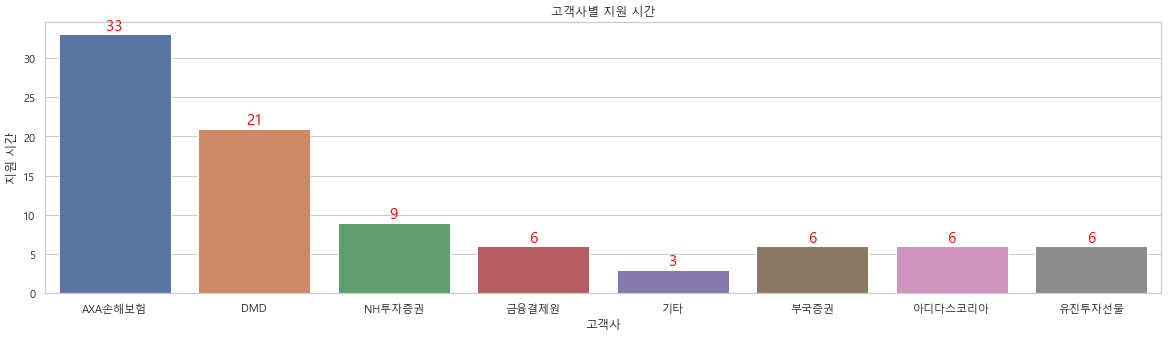

In [41]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,5))


fig = sns.barplot(x = 'COMPANY', y = 'SUM_HOUR', data = df_company )

plt.xlabel("고객사")
plt.ylabel("지원 시간")
plt.title("고객사별 지원 시간") # You can comment this line out if you don't need title

ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='red', ha='center', va='bottom')

plt.show(fig)


In [42]:
# 아래 그래프에 필요한 데이터 출력

c = conn.cursor()
c.execute("SELECT /* Group by EMP */ emp_name , count(*) cnt , sum(hour) hour  , sum(over_hour) over_hour \
FROM   usone_services \
WHERE  dept_name = 'DB' \
AND    service_date >= '{start}' \
AND    service_date <= '{end}' \
AND    service_type NOT IN ('상주','교육','휴가') \
GROUP BY emp_name" .format(start=start , end=end))

table_rows = c.fetchall()

df_emp = pd.DataFrame(table_rows , columns=['emp','cnt','hour','over'])

print(df_emp)


   emp  cnt  hour  over
0  권성진    4  18.0   0.0
1  김동혁    3  16.5   8.0
2  박경진    1   9.0   9.0
3  박준형    2   6.0   0.0
4  유명수    3  21.0   0.0
5  최순석    1   6.0   2.0
6  최영준    2  13.5   8.0


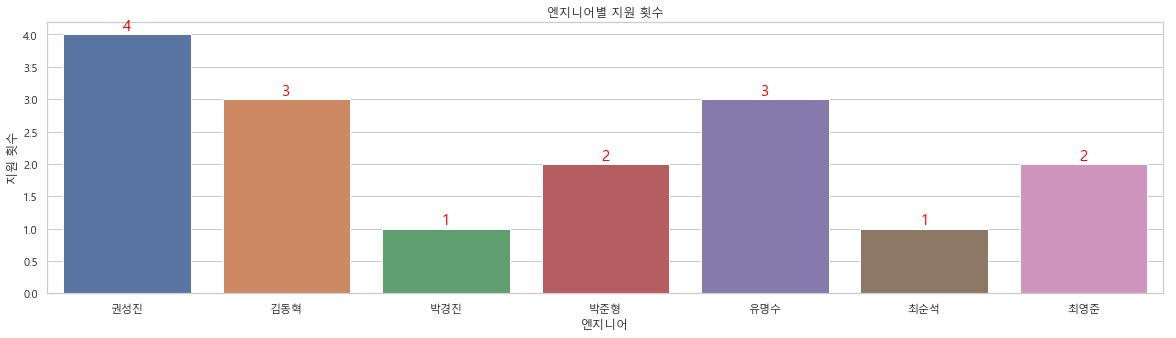

In [43]:
#########################
#  엔지니어별 지원 횟수
########################

import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,5))

fig = sns.barplot(x = 'emp', y = 'cnt', data = df_emp )
plt.xlabel("엔지니어")
plt.ylabel("지원 횟수")
plt.title("엔지니어별 지원 횟수") # You can comment this line out if you don't need title

ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='red', ha='center', va='bottom')

plt.show(fig)


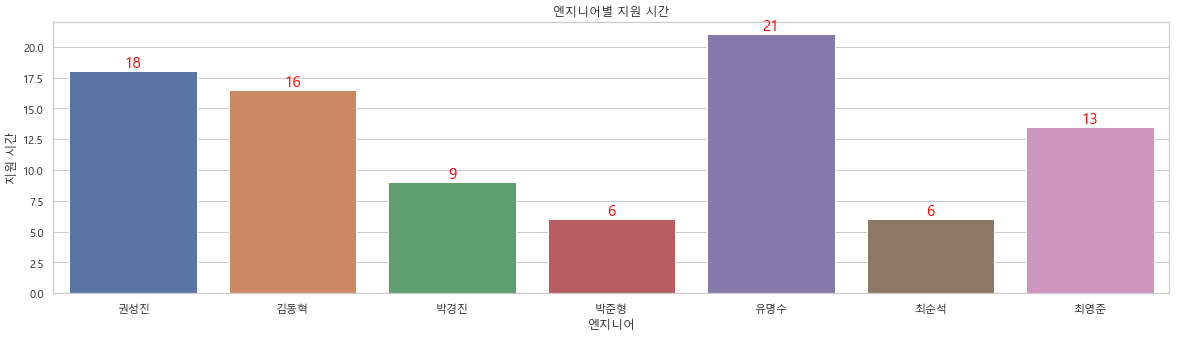

In [44]:

#########################
#  엔지니어별 지원 시간
########################

import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,5))

fig = sns.barplot(x = 'emp', y = 'hour', data = df_emp)
plt.xlabel("엔지니어")
plt.ylabel("지원 시간")
plt.title("엔지니어별 지원 시간") # You can comment this line out if you don't need title

ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='red', ha='center', va='bottom')

plt.show(fig)

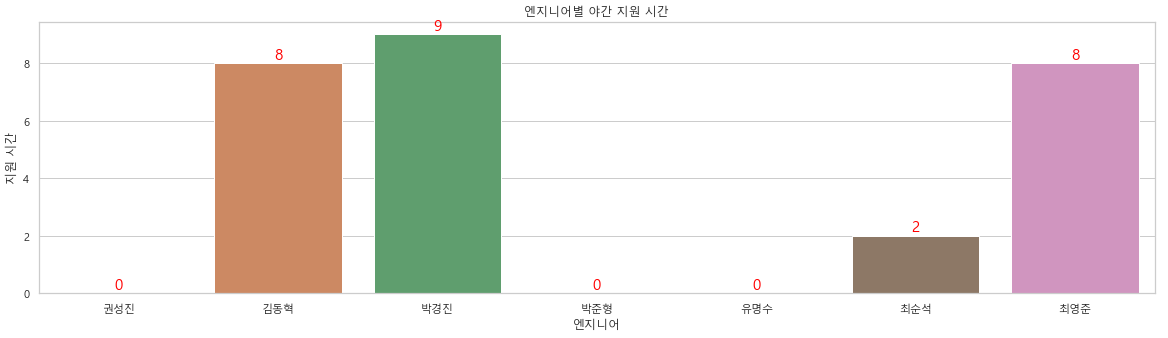

In [45]:
#########################
#  야간 근무
########################

import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,5))

fig = sns.barplot(x = 'emp', y = 'over', data = df_emp)
plt.xlabel("엔지니어")
plt.ylabel("지원 시간")
plt.title("엔지니어별 야간 지원 시간") # You can comment this line out if you don't need title

ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='red', ha='center', va='bottom')

plt.show(fig)